In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load data

In [4]:
# data set from https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation

In [5]:
df = pd.read_csv("bank_transactions.csv")

In [6]:
df.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


# 2. Check data quarity

In [7]:
# check data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [9]:
# check na

In [10]:
df.shape

(1048567, 9)

In [11]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [12]:
# check unique value

In [13]:
for i in df.columns:
    print('Columns name: ', i)
    print('Unique value: ', df[i].unique())
    print('Count unique value: ', df[i].nunique())
    print('-'*10)

Columns name:  TransactionID
Unique value:  ['T1' 'T2' 'T3' ... 'T1048565' 'T1048566' 'T1048567']
Count unique value:  1048567
----------
Columns name:  CustomerID
Unique value:  ['C5841053' 'C2142763' 'C4417068' ... 'C8020229' 'C6459278' 'C6420483']
Count unique value:  884265
----------
Columns name:  CustomerDOB
Unique value:  ['10/1/94' '4/4/57' '26/11/96' ... '18/7/65' '15/5/42' '24/10/44']
Count unique value:  17254
----------
Columns name:  CustGender
Unique value:  ['F' 'M' nan 'T']
Count unique value:  3
----------
Columns name:  CustLocation
Unique value:  ['JAMSHEDPUR' 'JHAJJAR' 'MUMBAI' ... 'KARANJIA'
 'NR HERITAGE FRESH HYDERABAD' 'IMPERIA THANE WEST']
Count unique value:  9355
----------
Columns name:  CustAccountBalance
Unique value:  [ 17819.05   2270.69  17874.44 ... 182889.37  15037.89   1002.96]
Count unique value:  161328
----------
Columns name:  TransactionDate
Unique value:  ['2/8/16' '1/8/16' '3/8/16' '5/8/16' '4/8/16' '6/8/16' '9/8/16' '8/8/16'
 '12/8/16' '7/8/

In [14]:
# date format will be a problem in our analysis

# 3. Data transformation

In [15]:
# Age
# Sex
# Urban/Suburban
# Average Transaction Time
# Average Ticket Size
# Average Balance
# Number of Transactions

In [16]:
# missing value

In [17]:
df.dropna(inplace=True)

In [18]:
# customer ID

In [19]:
distinct_customers = df['CustomerID'].unique()
distinct_customers_df = pd.DataFrame({'CustomerID': distinct_customers})

In [20]:
distinct_customers_df

,CustomerID
0,C5841053
1,C2142763
2,C4417068
3,C5342380
4,C9031234
...,...
879353,C5028150
879354,C1034220
879355,C8020229
879356,C6459278


In [21]:
# age

In [22]:
df[['day', 'month', 'year']] = df['CustomerDOB'].str.split('/', expand=True)

In [23]:
df['year'] = df['year'].astype(int)

In [24]:
print(df['year'].min(), df['year'].max())

0 1800


In [25]:
df_for_age = df[df['year'] <= 99]

In [26]:
df_for_age['Age'] = 2016 - (1900+df_for_age['year'])

C:\Users\peerapat\AppData\Local\Temp/ipykernel_12156/39089936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_age['Age'] = 2016 - (1900+df_for_age['year'])


In [27]:
customers_age_df = df_for_age.groupby('CustomerID')['Age'].max().reset_index()
customers_age_df.columns = ['CustomerID', 'Age']

In [28]:
customers_age_df

,CustomerID,Age
0,C1010011,33
1,C1010012,22
2,C1010014,32
3,C1010018,26
4,C1010024,51
...,...,...
839076,C9099836,26
839077,C9099877,20
839078,C9099919,23
839079,C9099941,21


In [29]:
# sex

In [30]:
df['CustGender'] = df['CustGender'].apply(lambda x: 1 if x == 'M' else 0)

In [31]:
customers_sex_df = df.groupby('CustomerID')['CustGender'].max().reset_index()
customers_sex_df.columns = ['CustomerID', 'Sex']

In [32]:
customers_sex_df

,CustomerID,Sex
0,C1010011,1
1,C1010012,1
2,C1010014,1
3,C1010018,0
4,C1010024,1
...,...,...
879353,C9099836,1
879354,C9099877,1
879355,C9099919,1
879356,C9099941,1


In [33]:
# city name

In [34]:
# top 10 most populous cities in India:

# Mumbai, Maharashtra
# Delhi, Delhi (NCT)
# Bangalore, Karnataka
# Hyderabad, Telangana
# Ahmedabad, Gujarat
# Chennai, Tamil Nadu
# Kolkata, West Bengal
# Surat, Gujarat
# Pune, Maharashtra
# Jaipur, Rajasthan

In [35]:
big_cities_india = ['MUMBAI', 'DELHI', 'BANGALORE', 'HYDERABAD', 'AHMEDABAD', 'CHENNAI', 'KOLKATA', 'SURAT', 'PUNE', 'JAIPUR']

In [36]:
def flag_big_city(city):
    if city.upper() in big_cities_india:
        return 1
    else:
        return 0

In [37]:
df['flag_big_city'] = df['CustLocation'].apply(flag_big_city)

In [38]:
customers_big_city_df = df.groupby('CustomerID')['flag_big_city'].max().reset_index()
customers_big_city_df.columns = ['CustomerID', 'BigCity']

In [39]:
customers_big_city_df

,CustomerID,BigCity
0,C1010011,0
1,C1010012,1
2,C1010014,1
3,C1010018,0
4,C1010024,1
...,...,...
879353,C9099836,0
879354,C9099877,1
879355,C9099919,0
879356,C9099941,1


In [40]:
# avg txn time

In [41]:
customers_txn_time_df = df.groupby('CustomerID')['TransactionTime'].mean().reset_index()
customers_txn_time_df.columns = ['CustomerID', 'TransactionTimeMinute']

In [42]:
customers_txn_time_df['TransactionTimeMinute'] = customers_txn_time_df['TransactionTimeMinute']/(60*60)

In [43]:
customers_txn_time_df

,CustomerID,TransactionTimeMinute
0,C1010011,18.755833
1,C1010012,56.780278
2,C1010014,52.049444
3,C1010018,47.292778
4,C1010024,39.195278
...,...,...
879353,C9099836,1.422778
879354,C9099877,33.404167
879355,C9099919,34.036944
879356,C9099941,59.367222


In [44]:
# ticket size

In [45]:
customers_ticket_size = df.groupby('CustomerID')['TransactionAmount (INR)'].mean().reset_index()
customers_ticket_size.columns = ['CustomerID', 'TicketSize']

In [46]:
customers_ticket_size

,CustomerID,TicketSize
0,C1010011,2553.0
1,C1010012,1499.0
2,C1010014,727.5
3,C1010018,30.0
4,C1010024,5000.0
...,...,...
879353,C9099836,691.0
879354,C9099877,222.0
879355,C9099919,126.0
879356,C9099941,50.0


In [47]:
# balance

In [48]:
customers_balance_df = df.groupby('CustomerID')['CustAccountBalance'].mean().reset_index()
customers_balance_df.columns = ['CustomerID', 'BalanceSize']

In [49]:
customers_balance_df

,CustomerID,BalanceSize
0,C1010011,76340.635
1,C1010012,24204.490
2,C1010014,100112.950
3,C1010018,496.180
4,C1010024,87058.650
...,...,...
879353,C9099836,133067.230
879354,C9099877,96063.460
879355,C9099919,5559.750
879356,C9099941,35295.920


In [50]:
# no txn

In [51]:
customers_no_txn_df = df.groupby('CustomerID')['TransactionID'].count().reset_index()
customers_no_txn_df.columns = ['CustomerID', 'NoTransaction']

In [52]:
customers_no_txn_df

,CustomerID,NoTransaction
0,C1010011,2
1,C1010012,1
2,C1010014,2
3,C1010018,1
4,C1010024,1
...,...,...
879353,C9099836,1
879354,C9099877,1
879355,C9099919,1
879356,C9099941,1


In [53]:
# merge all df

In [54]:
df_transformed = distinct_customers_df
df_transformed = pd.merge(df_transformed, customers_age_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_sex_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_big_city_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_txn_time_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_ticket_size, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_balance_df, on='CustomerID', how='left')
df_transformed = pd.merge(df_transformed, customers_no_txn_df, on='CustomerID', how='left')

In [55]:
df_transformed

,CustomerID,Age,Sex,BigCity,TransactionTimeMinute,TicketSize,BalanceSize,NoTransaction
0,C5841053,22.0,0,0,39.779722,25.0,17819.050,1
1,C2142763,59.0,1,0,39.405000,27999.0,2270.690,1
2,C4417068,20.0,0,1,39.642222,459.0,17874.440,1
3,C5342380,43.0,1,1,46.786389,1469.2,434849.495,2
4,C9031234,28.0,0,0,50.321111,1762.5,6714.430,1
...,...,...,...,...,...,...,...,...
879353,C5028150,36.0,1,1,51.286667,3000.0,464.870,1
879354,C1034220,24.0,1,1,51.315000,1500.0,1212.700,1
879355,C8020229,26.0,1,0,51.340000,799.0,7635.190,1
879356,C6459278,24.0,1,0,51.037222,460.0,27311.420,1


In [56]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879358 entries, 0 to 879357
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CustomerID             879358 non-null  object 
 1   Age                    839081 non-null  float64
 2   Sex                    879358 non-null  int64  
 3   BigCity                879358 non-null  int64  
 4   TransactionTimeMinute  879358 non-null  float64
 5   TicketSize             879358 non-null  float64
 6   BalanceSize            879358 non-null  float64
 7   NoTransaction          879358 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 60.4+ MB


In [57]:
# fill age na

In [58]:
mean_age = df_transformed['Age'].mean()

In [59]:
df_transformed['Age'].fillna(mean_age, inplace=True)

In [60]:
# check data again

In [61]:
df = df_transformed

In [62]:
df.head()

,CustomerID,Age,Sex,BigCity,TransactionTimeMinute,TicketSize,BalanceSize,NoTransaction
0,C5841053,22.0,0,0,39.779722,25.0,17819.050,1
1,C2142763,59.0,1,0,39.405000,27999.0,2270.690,1
2,C4417068,20.0,0,1,39.642222,459.0,17874.440,1
3,C5342380,43.0,1,1,46.786389,1469.2,434849.495,2
4,C9031234,28.0,0,0,50.321111,1762.5,6714.430,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879358 entries, 0 to 879357
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CustomerID             879358 non-null  object 
 1   Age                    879358 non-null  float64
 2   Sex                    879358 non-null  int64  
 3   BigCity                879358 non-null  int64  
 4   TransactionTimeMinute  879358 non-null  float64
 5   TicketSize             879358 non-null  float64
 6   BalanceSize            879358 non-null  float64
 7   NoTransaction          879358 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 60.4+ MB


In [64]:
df.columns

Index(['CustomerID', 'Age', 'Sex', 'BigCity', 'TransactionTimeMinute',
       'TicketSize', 'BalanceSize', 'NoTransaction'],
      dtype='object')

In [65]:
# drop customerID

In [66]:
df.drop('CustomerID', axis=1, inplace=True)

# 4. EDA

In [67]:
# describe

In [68]:
df.describe()

,Age,Sex,BigCity,TransactionTimeMinute,TicketSize,BalanceSize,NoTransaction
count,879358.000000,879358.000000,879358.000000,879358.000000,8.793580e+05,8.793580e+05,879358.000000
mean,31.866631,0.763298,0.405099,43.649628,1.566794e+03,1.147150e+05,1.184516
std,9.207944,0.425058,0.490911,13.630718,6.433248e+03,8.010838e+05,0.448954
min,17.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,26.000000,1.000000,0.000000,34.842778,1.908725e+02,5.591270e+03,1.000000
50%,30.000000,1.000000,0.000000,45.430000,5.000000e+02,1.866578e+04,1.000000
75%,35.000000,1.000000,1.000000,54.088611,1.241000e+03,6.154196e+04,1.000000
max,116.000000,1.000000,1.000000,65.544167,1.560035e+06,1.150355e+08,6.000000


In [69]:
# correlation matrix

In [70]:
corr = df.corr()

<AxesSubplot:>

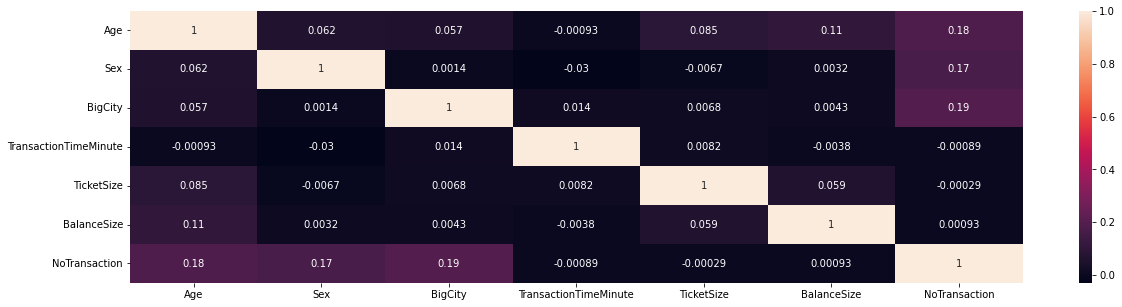

In [71]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr, annot=True, ax=ax)

In [72]:
# distribution

In [73]:
feature_cat = ['Sex','BigCity']
feature_num = ['Age','TransactionTimeMinute','TicketSize' ,'BalanceSize','NoTransaction']

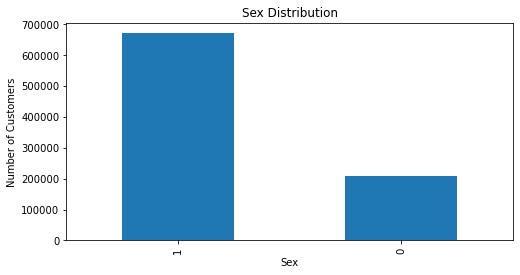

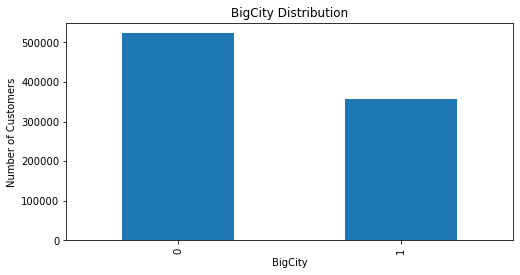

In [74]:
for col in feature_cat:
    df[col].value_counts().plot(kind='bar', figsize=(8, 4))
    plt.title(col + ' Distribution')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.show()

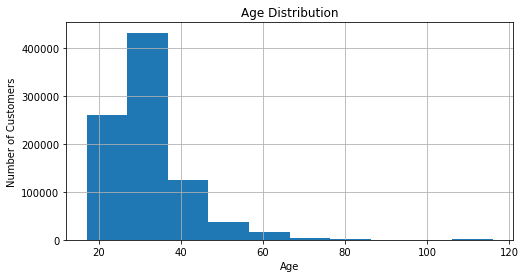

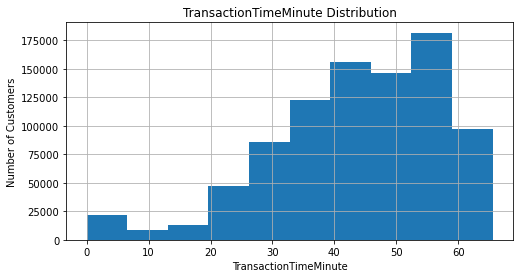

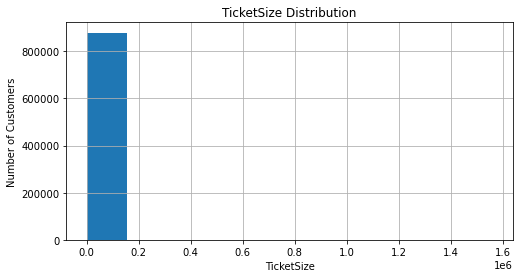

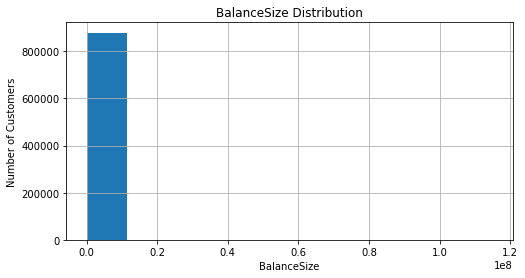

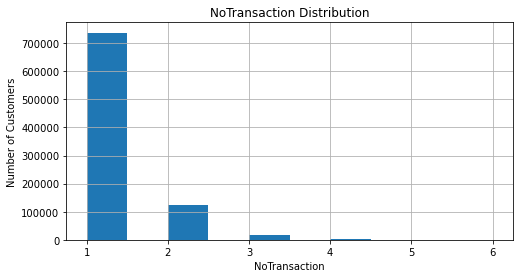

In [75]:
for col in feature_num:
    df[col].hist(figsize=(8, 4))
    plt.title(col + ' Distribution')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.show()

# 5. Model

In [76]:
# normalized

In [77]:
scaler = MinMaxScaler()

In [78]:
df_scaled = scaler.fit_transform(df)

In [79]:
# kmean

In [80]:
sse = []

In [81]:
list_k = list(range(1, 11))

In [82]:
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    sse.append(km.inertia_)

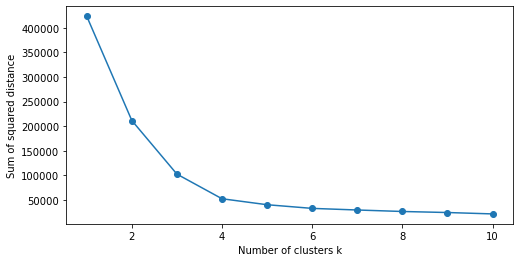

In [99]:
plt.figure(figsize=(8, 4))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distance')
plt.show()

In [84]:
# choose K = 4

In [85]:
km_4 = KMeans(n_clusters=4)

In [86]:
km_4.fit(df_scaled)

KMeans(n_clusters=4)

In [87]:
# predict

In [88]:
df['segment'] = km_4.predict(df_scaled)

In [89]:
df.head()

,Age,Sex,BigCity,TransactionTimeMinute,TicketSize,BalanceSize,NoTransaction,segment
0,22.0,0,0,39.779722,25.0,17819.050,1,2
1,59.0,1,0,39.405000,27999.0,2270.690,1,1
2,20.0,0,1,39.642222,459.0,17874.440,1,3
3,43.0,1,1,46.786389,1469.2,434849.495,2,0
4,28.0,0,0,50.321111,1762.5,6714.430,1,2


# 6. Result

In [90]:
# mean of attributes

In [91]:
df.groupby('segment').mean()

,Age,Sex,BigCity,TransactionTimeMinute,TicketSize,BalanceSize,NoTransaction
segment,,,,,,,
0,32.932420,1.0,1.0,43.694775,1597.267205,121512.315040,1.354916
1,31.672511,1.0,0.0,43.235677,1505.809306,112508.162380,1.139888
2,30.653708,0.0,0.0,44.307983,1611.175622,109794.062256,1.027040
3,31.127935,0.0,1.0,44.496732,1692.120499,110448.322763,1.077138


In [92]:
df.groupby('segment').count()

,Age,Sex,BigCity,TransactionTimeMinute,TicketSize,BalanceSize,NoTransaction
segment,,,,,,,
0,272157,272157,272157,272157,272157,272157,272157
1,399055,399055,399055,399055,399055,399055,399055
2,124076,124076,124076,124076,124076,124076,124076
3,84070,84070,84070,84070,84070,84070,84070


In [93]:
df.groupby('segment').mean().pivot_table(index=None, columns='segment')

segment,0,1,2,3
Age,32.932420,31.672511,30.653708,31.127935
BalanceSize,121512.315040,112508.162380,109794.062256,110448.322763
BigCity,1.000000,0.000000,0.000000,1.000000
NoTransaction,1.354916,1.139888,1.027040,1.077138
Sex,1.000000,1.000000,0.000000,0.000000
TicketSize,1597.267205,1505.809306,1611.175622,1692.120499
TransactionTimeMinute,43.694775,43.235677,44.307983,44.496732


# 7. PCA

In [94]:
X = df.drop(columns=["segment"])

In [95]:
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X)

In [96]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [97]:
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]
df["PCA3"] = X_pca[:, 2]

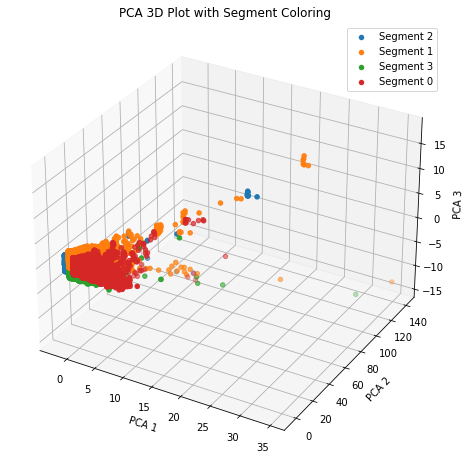

In [98]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for segment in df["segment"].unique():
    segment_data = df[df["segment"] == segment]
    ax.scatter(segment_data["PCA1"], segment_data["PCA2"], segment_data["PCA3"], label=f"Segment {segment}")

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("PCA 3D Plot with Segment Coloring")
ax.legend()
plt.show()